### **References**
- [https://nttuan8.com/bai-2-logistic-regression/](https://nttuan8.com/bai-2-logistic-regression/)
- [https://machinelearningcoban.com/2017/01/27/logisticregression/](https://machinelearningcoban.com/2017/01/27/logisticregression/)
- [https://machinelearningcoban.com/2017/01/27/logisticregression/](https://machinelearningcoban.com/2017/01/27/logisticregression/)

### **Example**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Logistic regression equations: $$y^{\prime}=\sigma\left(w_0+w_1x_1+w_2x_2\right)=\frac{1}{1+e^{-\left(w_0+w_1x_1+w_2x_2\right)}}$$
Loss func: $$L=-\left(y_{i}\log\left(y_{i}^{\prime}\right)+\left(1-y_{i}\right)log\left(1-y_{i}^{\prime}\right)\right)$$

### **Sklearn library**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [8]:
sk_data = pd.DataFrame({ 'learning_times': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
                         'passed': ['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'] })

# Process data
label_encoder = LabelEncoder()
sk_data['passed'] = label_encoder.fit_transform(sk_data['passed'])

print(sk_data)

    learning_times  passed
0             0.50       0
1             0.75       0
2             1.00       0
3             1.25       0
4             1.50       0
5             1.75       0
6             1.75       1
7             2.00       0
8             2.25       1
9             2.50       0
10            2.75       1
11            3.00       0
12            3.25       1
13            3.50       0
14            4.00       1
15            4.25       1
16            4.50       1
17            4.75       1
18            5.00       1
19            5.50       1


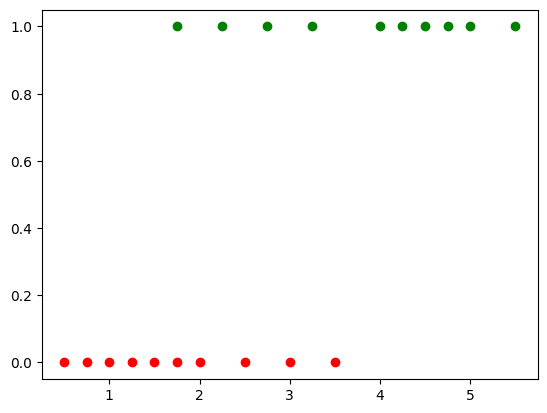

In [19]:
# Various line types, plot symbols and colors may be obtained with  
#     plot(X,Y,S) where S is a character string made from one element  
#     from any or all the following 3 columns:  
#              b     blue          .     point              -     solid  
#              g     green         o     circle             :     dotted  
#              r     red           x     x-mark             -.    dashdot   
#              c     cyan          +     plus               --    dashed   
#              m     magenta       *     star             (none)  no line
#              y     yellow        s     square
#              k     black         d     diamond
#              w     white         v     triangle (down)
#                                  ^     triangle (up)
#                                  <     triangle (left)
#                                  >     triangle (right)
#                                  p     pentagram
#                                  h     hexagram

passed = sk_data[sk_data['passed'] == 1]
failed = sk_data[sk_data['passed'] == 0]

plt.plot(passed['learning_times'], passed['passed'], 'go')
plt.plot(failed['learning_times'], failed['passed'], 'ro')

plt.show()

In [22]:
# features = ['learning_times']
features = ['learning_times']
target = 'passed'

X = sk_data[features]
y = sk_data[target]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = model.predict(X_test)
test_data = pd.DataFrame({ 'learning_times': X_test['learning_times'], 'passed': y_test, 'passed_predict': y_pred })
print(test_data)

    learning_times  passed  passed_predict
0             0.50       0               0
17            4.75       1               1
15            4.25       1               1
1             0.75       0               0


In [88]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

In [89]:
print('intercept_:', model.intercept_)
print('coef_:', model.coef_)
w = np.array([model.intercept_, model.coef_[0]])

intercept_: [-2.67387694]
coef_: [[0.96319315]]


In [90]:
print(sigmoid(np.dot(w[-1].T, [[X_train['learning_times']]])))

[[0.89726373 0.84364306 0.9473289  0.76923408 0.99196568 0.98705951
  0.96679147 0.72376067 0.91743402 0.99502114 0.80919527 0.95812855
  0.8728489  0.93393583 0.97922015 0.84364306]]


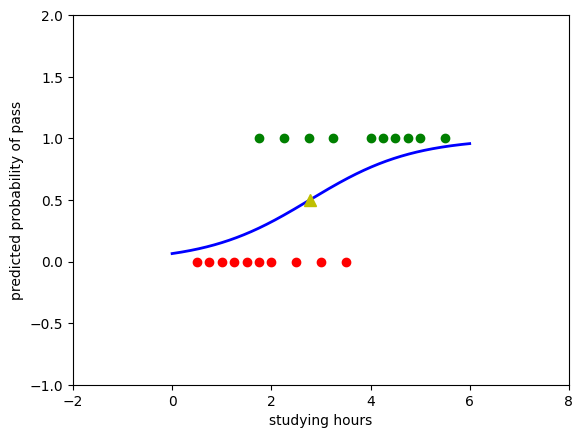

In [91]:
plt.plot(passed['learning_times'], passed['passed'], 'go')
plt.plot(failed['learning_times'], failed['passed'], 'ro')

xx = np.linspace(0, 6, 1000)
w0 = w[0][0]
w1 = w[1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'b-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [92]:
accuracy = model.score(X_test, y_test)
print('accuracy:', accuracy)

accuracy: 1.0
